****
**Table of Content**
  
- *Perceptron Definiton*
- *Perceptron Code Implementation*

****

## Perceptron Definition

 Perceptron is a type of supervised learning algorithm for **binary classification** tasks where the goal is to learn a decision boundary that can separate two classes of data.  
   
 In the perceptron algorithm, the input features are multiplied by corresponding weights, and the weighted sum is passed through an activation function (usually a step function) to produce a binary output. The weights are adjusted during training using a form of stochastic gradient descent to minimize the classification error.  

<img src="image/ThePerceptronImage.png" width="500">

In the above picture, $x_1^{(i)},x_2^{(i)}$ are input features. $w_1, w_2$ are weights.  
Activation functions are an essential component of deep neural networks that are used to introduce non-linearity into the network, enabling it to model complex relationships between inputs and outputs.  
- **pre-activation function:** It is a type of activation function that is applied before the activation function. In a neural network, the pre-activation function is typically a **linear transformation** that combines the input features with learnable weights and biases. The output of the pre-activation function is then passed through the activation function to introduce non-linearity.  
- **activation function:** It is a mathematical function that is applied to the output of each neuron in a neural network to introduce **non-linearity**. Activation functions include commonly used functions like sigmoid, ReLU, tanh, and softmax.  
- **post activation function:** It is a type of activation function that is applied after the activation function. In a neural network, the post-activation function is typically a transformation that acts on the output of the activation function. For example, in a convolutional neural network(CNN), the output of the ReLU activation function is often passed through a pooling or normalization layer.  


The perceptron algorithm was one of the earliest forms of artificial neural networks and has paved the way for more complex neural network architectures used in deep learning today.

## Perceptron Code Implementation

### Packages and Dataset

In [21]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/main/Lecture_2/Datasets/iris_dataset.csv") 

### Data Overview

In [3]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Map "setosa" species to -1 and "versicolor" species to 1.

In [4]:
# Extract the data we need 

y = iris.iloc[0:100].species.values # get the first 100 rows of the species column
y = np.where(y == 'setosa', -1, 1) # if the species is setosa, then -1, else 1
X = iris[['sepal_length', 'petal_length']].iloc[0:100].values # get the first 100 rows of the sepal_length and petal_length columns

print(f"{y.shape = }")
print(f"{X.shape = }")

y.shape = (100,)
X.shape = (100, 2)


In [13]:
# Establish Model

import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None 
        self.bias = None
    
    def train(self, X, y):
        n_samples, n_features = X.shape
        
        # initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # iterate over the data for num_iterations
        for _ in range(self.num_iterations):
            for i in range(n_samples):
                # calculate the prediction
                linear_output = np.dot(self.weights, X[i]) + self.bias
                y_predicted = self._activate(linear_output)
                
                # update the weights and bias if prediction is incorrect
                if y_predicted != y[i]:
                    update = self.learning_rate * (y[i] - y_predicted)
                    self.weights += update * X[i]
                    self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activate(linear_output)
        return y_predicted
    
    def _activate(self, linear_output):
        return np.where(linear_output >= 0, 1, -1)


In [14]:
# create a dataset
X = np.array([[2, 4], [4, 2], [1, 1], [5, 5]])
y = np.array([1, 1, -1, -1])

# create an instance of the Perceptron class and train it
model = Perceptron(learning_rate=0.1, num_iterations=100)
model.train(X, y)

# make predictions on new data
X_new = np.array([[3, 3], [6, 6]])
y_pred = model.predict(X_new)
print(y_pred)  # output: [-1, -1]


[-1 -1]


In [17]:
y = iris.iloc[0:100].species.values # get the first 100 rows of the species column
y = np.where(y == 'setosa', -1, 1) # if the species is setosa, then -1, else 1
X = iris[['sepal_length', 'petal_length']].iloc[0:100].values # get the first 100 rows of the sepal_length and petal_length columns
# Instantiate one instance of the Perceptron class
clf = Perceptron(num_iterations = 100)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

In [18]:
# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


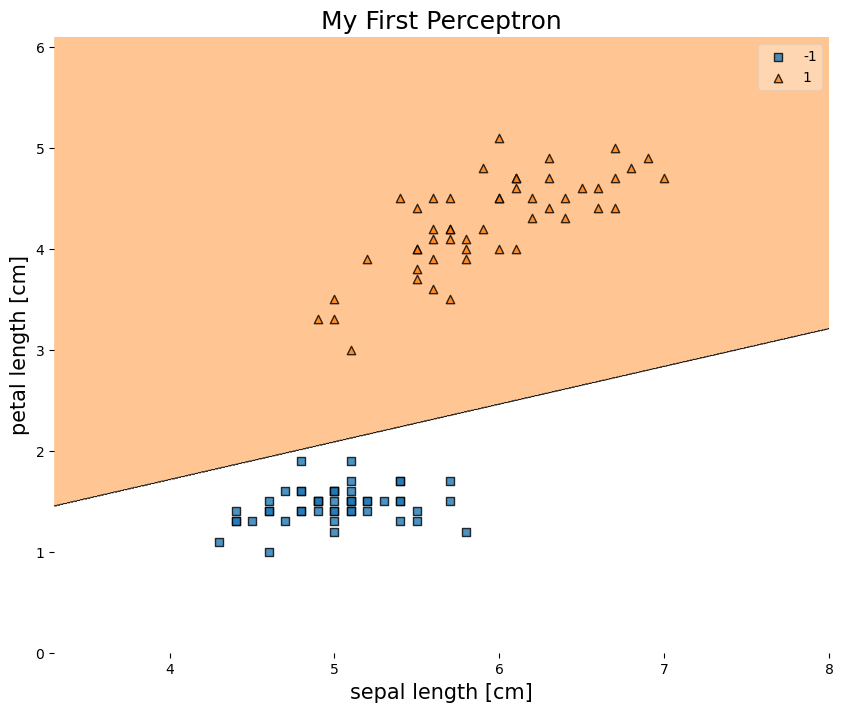

In [28]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()